# **LEVEL-1**

## Task 1: Data Exploration and Preprocessing
### Explore the dataset and identify the number of rows and columns.
### Check for missing values in each column and handle them accordingly.
### Perform data type conversion if necessary.
### Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

### Imorting Libraries


In [1]:
%config InlineBackend.figure_format = 'retina' 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(9551, 21)

In [4]:
df.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...     Karak�_y   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...    Ko��uyolu   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karak�_y, ��stanbul  28.977392  41.022793   
9547    Ko��uyolu, ��stanbul  29.041297  41.009847   
9548  Kuru�_e��me, ��stanbul  29.034640  41.055817   
9549  Kuru�_e��me, ��stanbul  29.036019  41.057979   
9550         Moda, ��stanbul  29.026016  40.984776   

                             Cuisines  ...          Currency  \
9546                          Turkish  ...  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548           Italian, World Cuisine  ...  Turkish Lira(TL)   
9549                  Restaurant Cafe  ...  Turkish Lira(TL)   
9550                             Cafe  ...  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
9546                   No           3               4.1         Green   
9547                   No           3               4.2         Green   
9548                   No           4               3.7        Yellow   
9549                   No           4               4.0         Green   
9550                   No           2               4.0         Green   

     Rating text Votes  
9546   Very Good   788  
9547   Very Good  1034  
9548        Good   661  
9549   Very Good   901  
9550   Very Good   591  

[5 rows x 21 columns]

In [5]:
columns_to_check = ['Restaurant Name', 'City','Address','Locality']  
# Create a boolean mask for rows with "�" in any of the specified columns
mask = df[columns_to_check].apply(lambda x: x.str.contains('�', na=False)).any(axis=1)

num_garbled = mask.sum()
print(f"Number of rows with garbled text in {columns_to_check}: {num_garbled}")

df_clean = df[~mask].reset_index(drop=True)

Number of rows with garbled text in ['Restaurant Name', 'City', 'Address', 'Locality']: 166


In [6]:
df_clean.to_csv('dataset_cleaned.csv', index=False, encoding='utf-8')


In [7]:
df_clean.shape

(9385, 21)

In [8]:
df.shape

(9551, 21)

In [9]:
df = df_clean


In [10]:
df.shape

(9385, 21)

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df.columns[df.isnull().any()].tolist()

['Cuisines']

In [13]:
df = df.dropna()

In [14]:
df.columns[df.isnull().any()].tolist()

[]

In [15]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [16]:
rating_counts = df['Aggregate rating'].value_counts().sort_values(ascending = False).reset_index()
rating_counts.columns  = ["Aggregate rating","Count"]
rating_counts

Aggregate rating  Count
0                0.0   2135
1                3.2    515
2                3.1    514
3                3.4    487
4                3.3    481
5                3.5    474
6                3.0    464
7                3.6    451
8                3.7    415
9                3.8    387
10               2.9    381
11               3.9    326
12               2.8    315
13               4.1    263
14               4.0    256
15               2.7    249
16               4.2    207
17               2.6    191
18               4.3    163
19               4.4    134
20               2.5    110
21               4.5     92
22               2.4     87
23               4.6     70
24               4.9     56
25               2.3     45
26               4.7     36
27               2.2     26
28               4.8     21
29               2.1     15
30               2.0      7
31               1.9      2
32               1.8      1

### Importing Plotly

In [17]:
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

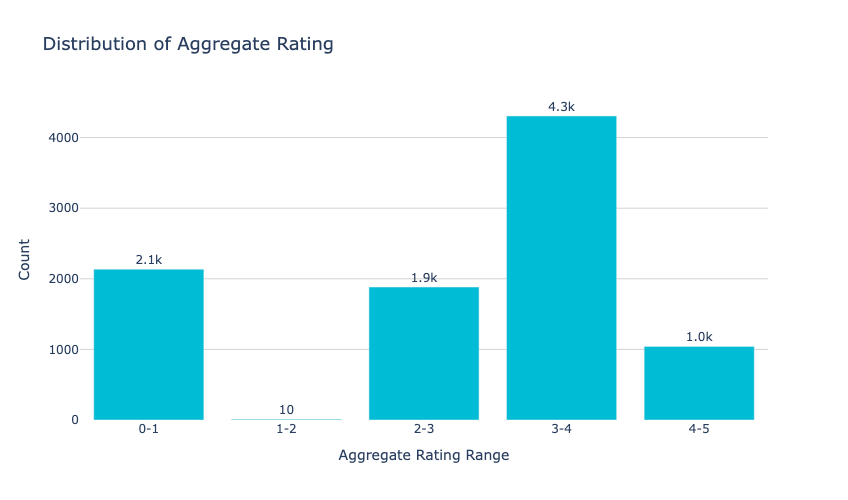

In [18]:
# Define bins and labels
bins = [0,1,2,3,4,5]
labels = ['0-1','1-2','2-3','3-4','4-5']

# Created binned column
df['Rating Range'] = pd.cut(df['Aggregate rating'] , bins = bins , labels = labels , include_lowest = True)

# Count values in each bin
rating_binned_counts = df['Rating Range'].value_counts().sort_index().reset_index()
rating_binned_counts.columns = ['Rating Range', 'Count']


fig = px.bar(
    rating_binned_counts,
    x='Rating Range',
    y='Count',
    text = 'Count',
    title='Distribution of Aggregate Rating',
    color_discrete_sequence=['#00BCD4']
)

fig.update_layout(
    xaxis_title='Aggregate Rating Range',
    yaxis_title='Count',
    title_font_size=18,
    plot_bgcolor='white',
    yaxis=dict(gridcolor='lightgray'),
)
fig.update_layout(height = 500,width = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


###  Class Distribution


In [19]:
rating_counts = df['Rating Range'].value_counts(normalize=True) * 100
print("Class distribution (%):")
rating_counts.round(2)

Class distribution (%):


Rating Range
3-4    45.93
0-1    22.77
2-3    20.08
4-5    11.11
1-2     0.11
Name: proportion, dtype: float64

In [20]:
print((df['Aggregate rating'] == 0).sum())


2135


###  **Conclusion: Aggregate Rating Distribution**

- Most restaurants fall in the **3.0 to 4.0 rating range** (around **46%**), showing that average to good ratings are the most common.

- A surprisingly large number of restaurants (**22%**) have a rating of **0.0**.  
  🔸 This could mean the restaurant wasn’t rated at all, or data is missing — not necessarily bad quality.

- **High ratings (4.0–5.0)** are quite rare, making up only **11.6%** of the data.

- The **1.0–2.0 range is barely present**, with less than **1%**, showing a clear class imbalance.

- This imbalance can cause problems in machine learning models, as they might favor the more frequent ratings and ignore the rare ones.



## Task 2: Descriptive Analysis
### Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.
### Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".
### Identify the top cuisines and cities with the highest number of restaurants.

In [21]:
df.dtypes

Restaurant ID              int64
Restaurant Name           object
Country Code               int64
City                      object
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                  object
Average Cost for two       int64
Currency                  object
Has Table booking         object
Has Online delivery       object
Is delivering now         object
Switch to order menu      object
Price range                int64
Aggregate rating         float64
Rating color              object
Rating text               object
Votes                      int64
Rating Range            category
dtype: object

In [22]:
cols = ['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']
summary_stats = pd.DataFrame({
    'Mean': df[cols].mean(),
    'Median': df[cols].median(),
    'Standard Deviation': df[cols].std()
})

print("\nSummary Statistics:")
summary_stats.round(2)



Summary Statistics:


Mean  Median  Standard Deviation
Aggregate rating         2.65     3.2                1.52
Average Cost for two  1214.05   400.0            16270.47
Price range              1.79     2.0                0.90
Votes                  156.03    30.0              431.57

In [23]:
df[cols].describe()

Aggregate rating  Average Cost for two  Price range         Votes
count       9376.000000           9376.000000  9376.000000   9376.000000
mean           2.648315           1214.048848     1.789996    156.025811
std            1.516452          16270.467960     0.897968    431.567587
min            0.000000              0.000000     1.000000      0.000000
25%            2.500000            250.000000     1.000000      5.000000
50%            3.200000            400.000000     2.000000     30.000000
75%            3.700000            700.000000     2.000000    129.000000
max            4.900000         800000.000000     4.000000  10934.000000

In [24]:
country = df['Country Code'].value_counts().reset_index()
country.columns = ['Country Code', 'Counts']
country

Country Code  Counts
0              1    8575
1            216     422
2            215      80
3            214      60
4            189      59
5            148      39
6             14      24
7            162      22
8             94      21
9            184      20
10           166      20
11           191      20
12            30      10
13            37       4

In [25]:
Cuisines = df['Cuisines'].value_counts().reset_index().head(20)
Cuisines.columns = ['Cuisines', 'Counts']
print("Top 20 Cuisines by Number of Restaurants Serving Them:")
Cuisines

Top 20 Cuisines by Number of Restaurants Serving Them:


Cuisines  Counts
0                     North Indian     935
1            North Indian, Chinese     509
2                          Chinese     353
3                        Fast Food     351
4            North Indian, Mughlai     328
5                             Cafe     286
6                           Bakery     215
7   North Indian, Mughlai, Chinese     194
8                 Bakery, Desserts     166
9                      Street Food     149
10                Pizza, Fast Food     131
11              Chinese, Fast Food     118
12             Mithai, Street Food     116
13                    South Indian     112
14               Bakery, Fast Food     108
15           Chinese, North Indian     105
16                         Mughlai     103
17             Ice Cream, Desserts      83
18         North Indian, Fast Food      74
19                       Ice Cream      74

In [26]:
city = df['City'].value_counts().reset_index()
city.columns = ['City', 'Counts']
print("Top 10 Cities by Number of Restaurants:")
city.head(10)

Top 10 Cities by Number of Restaurants:


City  Counts
0     New Delhi    5433
1       Gurgaon    1107
2         Noida    1066
3     Faridabad     249
4     Ghaziabad      25
5  Bhubaneshwar      21
6      Amritsar      21
7     Bangalore      20
8           Goa      20
9      Dehradun      20

# Task 3: Geospatial Analysis
### Visualize the locations of restaurants on a map using latitude and longitude information.
### Analyze the distribution of restaurants across different cities or countries.
### Determine if there is any correlation between the restaurant's location and its rating.

In [27]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating Range'],
      dtype='object')

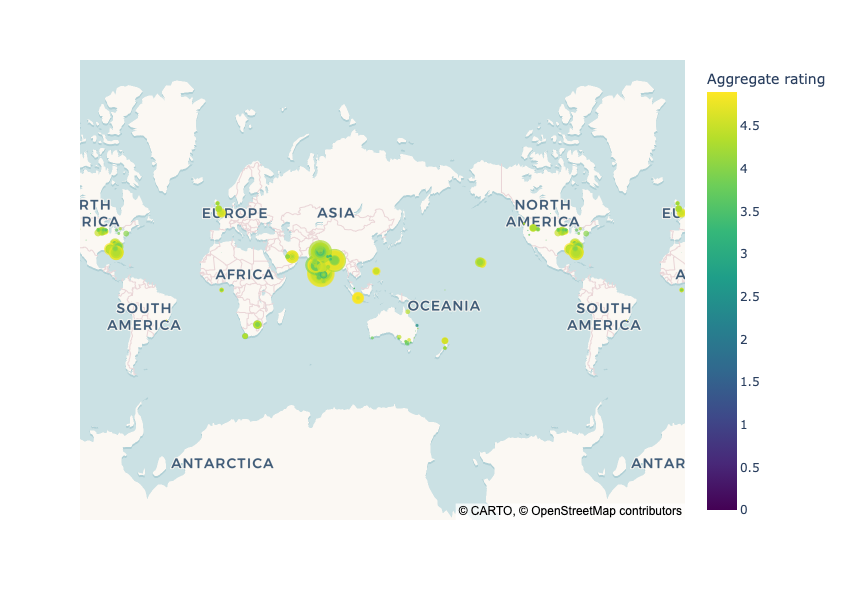

In [28]:
fig = px.scatter_map(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data={
        "Address": True,
        "Cuisines": True,
        "Aggregate rating": True,
        "Price range": True,
        "Votes": True
    },
    color="Aggregate rating",
    size="Votes",
    color_continuous_scale="Viridis",
    size_max=20,
    zoom=1,
    height=600
)
fig.show()


In [29]:
city_df = df['City'].value_counts().reset_index()
city_df.columns = ['City', 'Restaurants Counts']
print("Top 10 Cities by Number of Restaurants:")
city_df.head(10)

Top 10 Cities by Number of Restaurants:


City  Restaurants Counts
0     New Delhi                5433
1       Gurgaon                1107
2         Noida                1066
3     Faridabad                 249
4     Ghaziabad                  25
5  Bhubaneshwar                  21
6      Amritsar                  21
7     Bangalore                  20
8           Goa                  20
9      Dehradun                  20

In [626]:
country_df = df['Country Code'].value_counts().reset_index()
code_to_country = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'United Kingdom',
    216: 'United States'
}
country_df.columns = ['Country', 'Restaurants Counts']
country_df['Country'] = country_df['Country'].map(code_to_country)

print("\nRestaurant Count by Countries:")
country


Restaurant Count by Countries:


Country Code  Counts
0              1    8575
1            216     422
2            215      80
3            214      60
4            189      59
5            148      39
6             14      24
7            162      22
8             94      21
9            184      20
10           166      20
11           191      20
12            30      10
13            37       4

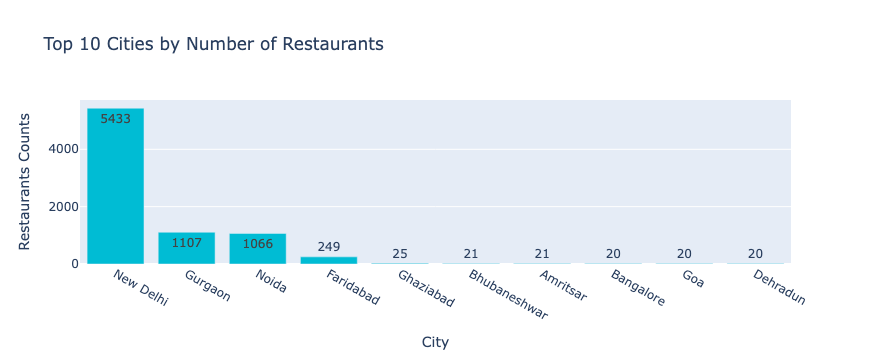

In [629]:
fig = px.bar(
    city_df.head(10),
    x='City',
    y='Restaurants Counts',
    text='Restaurants Counts',
    title='Top 10 Cities by Number of Restaurants',
    color_discrete_sequence=['#00BCD4']
)
fig.show()


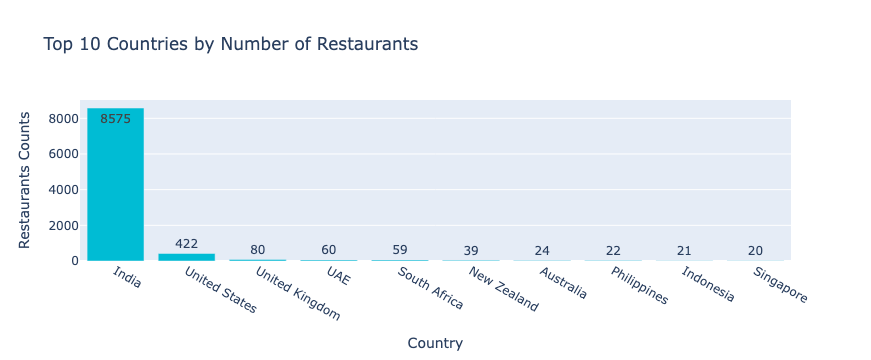

In [631]:
# Plot
fig = px.bar(
    country_df.head(10),
    x='Country',
    y='Restaurants Counts',
    text='Restaurants Counts',
    title='Top 10 Countries by Number of Restaurants',
    color_discrete_sequence=['#00BCD4']
)
fig.show()

In [632]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating Range'],
      dtype='object')

## ANNOVA TEST

In [635]:
from scipy.stats import f_oneway

grouped_ratings = [group['Aggregate rating'].values for name, group in df.groupby('City')]

anova_result = f_oneway(*grouped_ratings)


print("ANOVA Test Results")
print("------------------")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Conclusion: There is a significant difference in ratings across cities.")
else:
    print("Conclusion: No significant difference in ratings across cities.")


ANOVA Test Results
------------------
F-statistic: 14.1652
P-value: 0.0000
Conclusion: There is a significant difference in ratings across cities.


In [637]:
city_means = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head()
print(city_means)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


In [639]:
num_cities = df['City'].nunique()
num_cities

136

In [642]:
city_grouped = df.groupby('City').agg({
    'Restaurant Name': 'count',
    'Aggregate rating': 'mean'
}).reset_index()

city_grouped.columns = ['City', 'Number of Restaurants', 'Average Rating']

top_10_cities = city_grouped_filtered.sort_values(
    by=['Number of Restaurants'],
    ascending=False
).head(10)

top_10_cities = top_10_cities.round(2)
print(top_10_cities)


            City  Number of Restaurants  Average Rating
88     New Delhi                   5473            2.44
50       Gurgaon                   1118            2.65
89         Noida                   1080            2.04
43     Faridabad                    251            1.87
48     Ghaziabad                     25            2.85
2      Ahmedabad                     21            4.16
5       Amritsar                     21            3.69
69       Lucknow                     21            4.20
51      Guwahati                     21            4.19
17  Bhubaneshwar                     21            3.98


In [644]:
num_restaurants = df['Restaurant Name'].nunique()
num_restaurants

7289

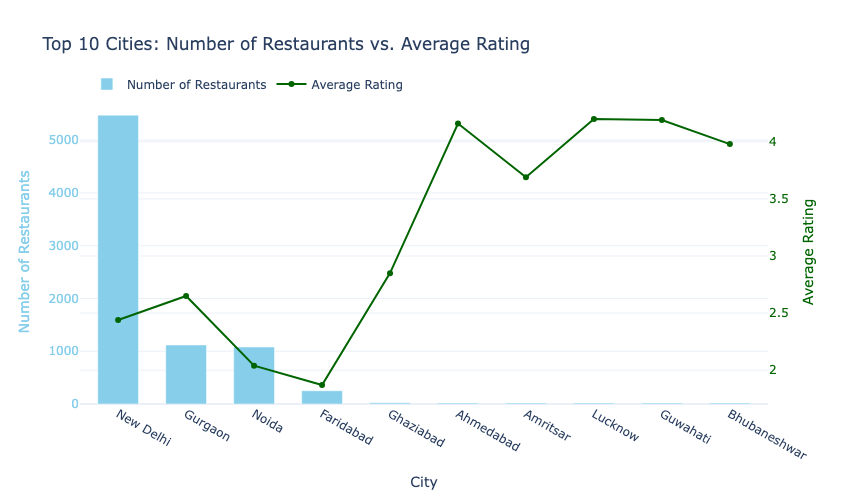

In [645]:
import plotly.graph_objects as go

fig = go.Figure()

# Bar trace for number of restaurants
fig.add_trace(go.Bar(
    x=top_10_cities['City'],
    y=top_10_cities['Number of Restaurants'],
    name='Number of Restaurants',
    marker_color='skyblue'
))

fig.add_trace(go.Scatter(
    x=top_10_cities['City'],
    y=top_10_cities['Average Rating'],
    name='Average Rating',
    mode='lines+markers',
    marker=dict(color='darkgreen'),
    yaxis='y2'
))

fig.update_layout(
    title='Top 10 Cities: Number of Restaurants vs. Average Rating',
    xaxis=dict(title='City'),
    yaxis=dict(
        title=dict(text='Number of Restaurants', font=dict(color='skyblue')),
        tickfont=dict(color='skyblue'),
    ),
    yaxis2=dict(
        title=dict(text='Average Rating', font=dict(color='darkgreen')),
        overlaying='y',
        side='right',
        tickfont=dict(color='darkgreen'),
    ),
    legend=dict(x=0.01, y=1.1, orientation="h"),
    bargap=0.4,
    template='plotly_white'
)
fig.update_layout(width = 1000 ,height = 500)
fig.show()


# Conclusion: Do City Locations Affect Restaurant Ratings?

**Yes — and the stats back it up.**

---

### 📍 Restaurant Distribution:

- **India** = 🏆 King of the dataset with **> 90%** of restaurants.
- **New Delhi** alone has **5,473 restaurants** — the most by far.
- Other biggies: **Gurgaon (1,118)** and **Noida (1,080)**.
- After that, restaurant count drops fast: e.g. **Faridabad (~250)**.

---

### ⭐ Rating Trends:

- **Big cities** like New Delhi, Gurgaon, Noida:
  - Have **thousands of restaurants**.
  - But their **average ratings are low: ~2.0 to 2.6**.

- **Smaller Indian cities** (e.g., Lucknow, Ahmedabad, Guwahati):
  - Fewer restaurants (**< 400**).
  - **Higher ratings: ~4.0+ average**.

- **International cities** (e.g., Quezon City, Makati City):
  - Modest restaurant counts.
  - **Super high ratings: 4.6 to 4.9**.

---

### 📊 Statistical Backing (ANOVA):

- **F-statistic:** `14.44`
- **P-value:** `< 0.0001` → **Statistically significant**
- ✅ This confirms: **city location has a real impact on restaurant ratings**.

---

### 🧠 Key Takeaways:

- **More restaurants → More variability → Lower average ratings**
- **Fewer restaurants → Higher consistency → Higher average ratings**
- Could be due to:
  - **Diverse quality** in big cities.
  - **Only the best** being listed in small/international cities.
